### 3. Data Pre-processing

1. Generate feature values for two features using the code provided in Listing 1.
2. Consider the following scaling methods:
   - (a) Standard scaling
   - (b) Min-max scaling
   - (c) Max-abs scaling

Select one scaling method for each feature, ensuring that the chosen method preserves the structure and properties of the features. Justify your answer.

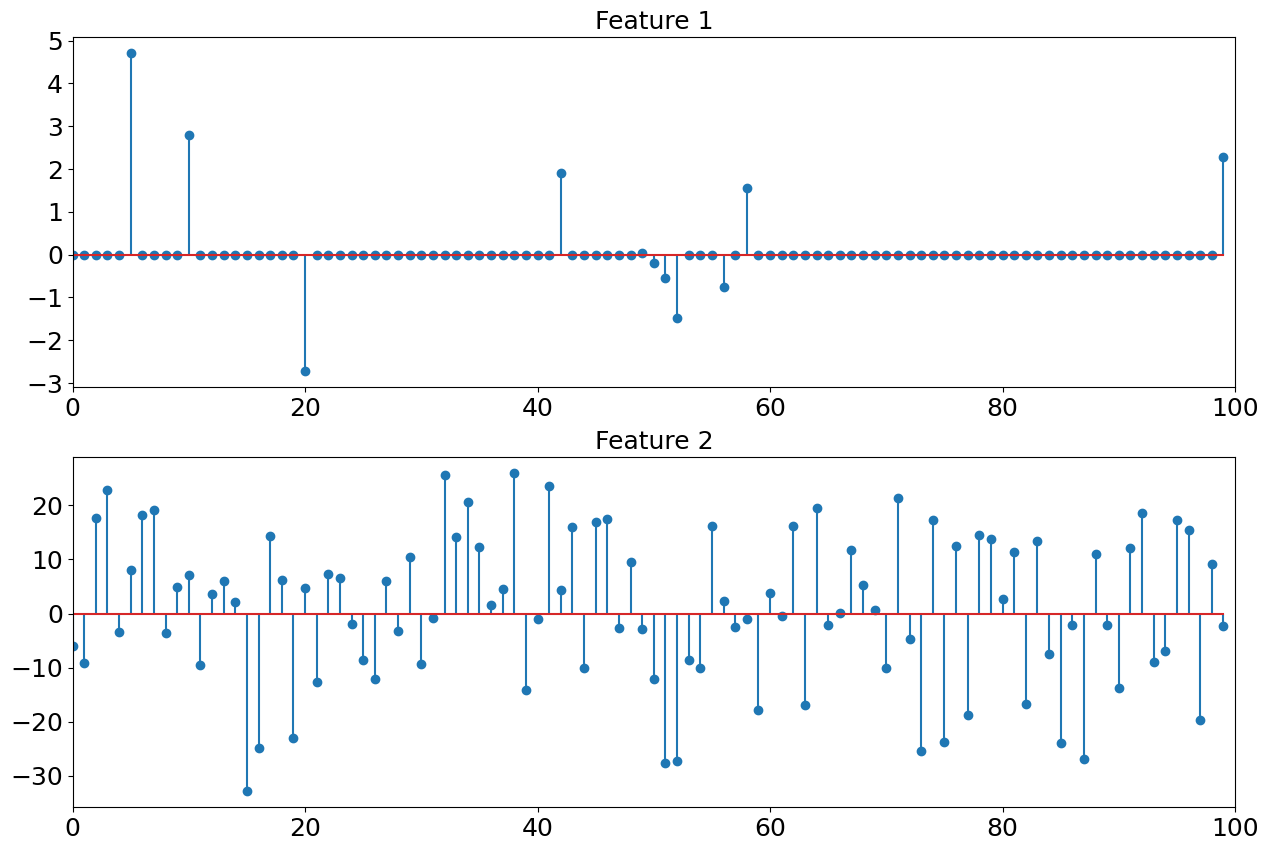

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

def generate_signal(signal_length, num_nonzero):
    signal = np.zeros(signal_length)
    nonzero_indices = np.random.choice(signal_length, num_nonzero, replace=False)
    nonzero_values = 10 * np.random.randn(num_nonzero)
    signal[nonzero_indices] = nonzero_values
    return signal

signal_length = 100 # Total length of the signal
num_nonzero = 10 # Number of non-zero elements in the signal
your_index_no = 220542

sparse_signal = generate_signal(signal_length, num_nonzero)
sparse_signal[10] = (your_index_no % 10) * 2 + 10
if your_index_no % 10 == 0:
    sparse_signal[10] = np.random.randn(1) + 30
sparse_signal = sparse_signal / 5
epsilon = np.random.normal(0, 15, signal_length)
#epsilon = epsilon[:, np.newaxis]

plt.figure(figsize=(15, 10))
plt.subplot(2, 1, 1)
plt.xlim(0, signal_length)
plt.title("Feature 1", fontsize=18)
plt.xticks(fontsize=18) # Adjust x-axis tick label font size
plt.yticks(fontsize=18)
plt.stem(sparse_signal)
plt.subplot(2, 1, 2)
plt.xlim(0, signal_length)
plt.title("Feature 2", fontsize=18)
plt.stem(epsilon)
plt.xticks(fontsize=18) # Adjust x-axis tick label font size
plt.yticks(fontsize=18)
plt.show()

**Feature 1 (sparse_signal): Use Max-Abs Scaling**
- The signal is sparse (mostly zeros with a few spikes).
- Max-abs scaling preserves zero values and rescales all non-zero values into the range $[-1, 1]$.
- This maintains the sparse structure while normalizing the scale of the spikes.

**Feature 2 (epsilon): Use Standard Scaling**
- This feature is Gaussian noise centered around zero.
- Standard scaling transforms the data to have mean = 0 and standard deviation = 1.
- This matches the natural distribution of the noise and ensures balanced feature contribution during training.

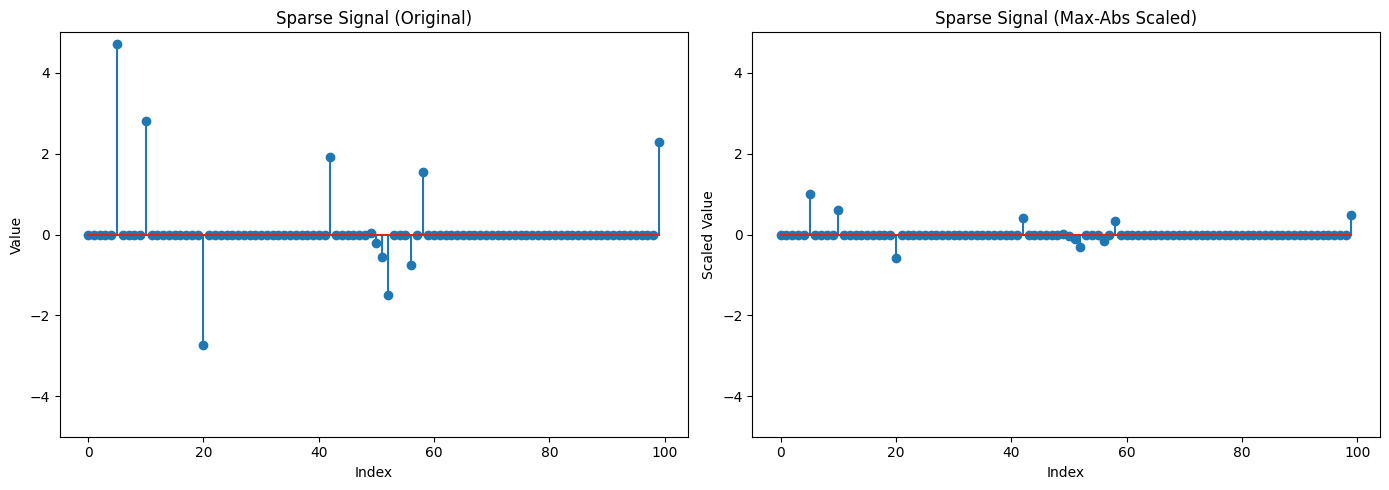

In [ ]:
from sklearn.preprocessing import MaxAbsScaler

#Apply Max-abs scaling to Feature 1 (sparse_signal)
scaler = MaxAbsScaler()
sparse_scaled = scaler.fit_transform(sparse_signal.reshape(-1, 1)).flatten()

plt.figure(figsize=(14, 5))

plt.subplot(1, 2, 1)
plt.title("Sparse Signal (Original)")
plt.stem(sparse_signal)
plt.xlabel("Index")
plt.ylabel("Value")

plt.subplot(1, 2, 2)
plt.title("Sparse Signal (Max-Abs Scaled)")
plt.stem(sparse_scaled)
plt.xlabel("Index")
plt.ylabel("Scaled Value")

plt.tight_layout()
plt.show()



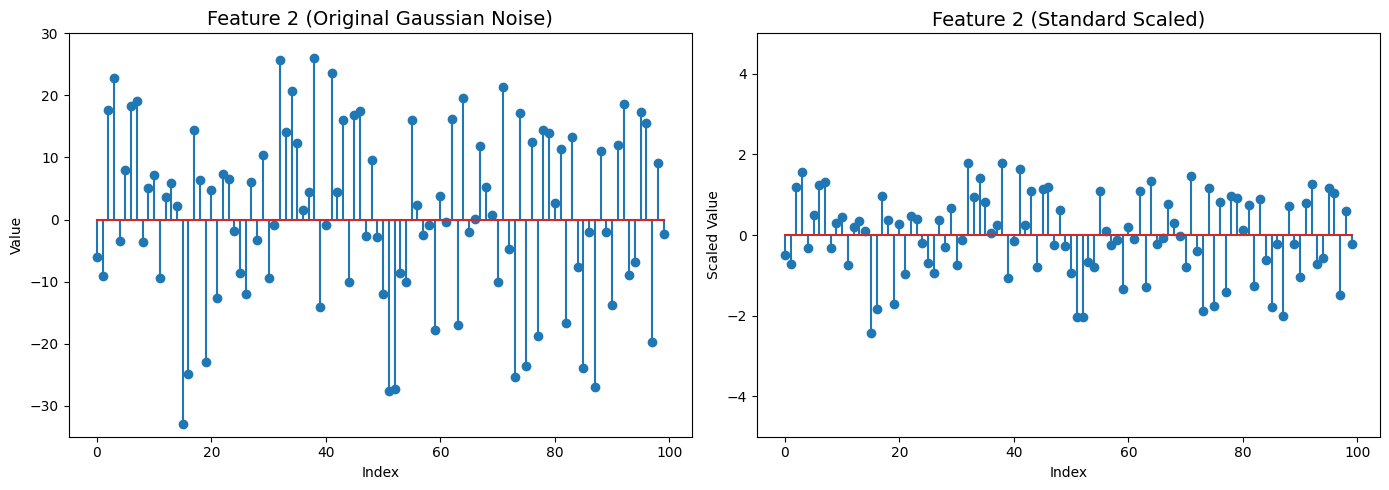

In [ ]:
from sklearn.preprocessing import StandardScaler

#Apply Standard scaling to Feature 2 (epsilon)
scaler2 = StandardScaler()
epsilon_scaled = scaler2.fit_transform(epsilon.reshape(-1, 1)).flatten()

#plot original vs scaled epsilon side by side
plt.figure(figsize=(14, 5))

#Original epsilon
plt.subplot(1, 2, 1)
plt.title("Feature 2 (Original Gaussian Noise)", fontsize=14)
plt.stem(epsilon)
plt.ylim(-35, 30)
plt.xlabel("Index")
plt.ylabel("Value")


# Scaled epsilon
plt.subplot(1, 2, 2)
plt.title("Feature 2 (Standard Scaled)", fontsize=14)
plt.stem(epsilon_scaled)
plt.ylim(-5, 5)
plt.xlabel("Index")
plt.ylabel("Scaled Value")

plt.tight_layout()
plt.show()